In [1]:
from rtreesTest import rTreeKmeans
import matplotlib.pyplot as plt
from rtreesTest import vector
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.patches as mpatches

In [2]:
routes_dict, stops_dict, points_dict = rTreeKmeans.collectData()

In [3]:
tree, tree_keys = rTreeKmeans.rTreeify(points_dict)

In [4]:
route_num = 39300
route = routes_dict[str(route_num)]
r = 0.005

In [5]:
result_set = rTreeKmeans.routeTreeIntersection(route, tree, tree_keys, points_dict, r)

In [6]:
proj = rTreeKmeans.projectPoints(route, points_dict, result_set, tree_keys)

In [7]:
stops = rTreeKmeans.findStops(len(route['properties']['route_stops']), proj)

In [8]:
def visualize(route,points_dict,intersecting_points,tree_keys,using_idx=True):
    '''check to see if a route on the map has indeed drawn the correct points in the intersecting set versus the rest of the points'''

    route_x = [c[1] for c in route['geometry']['coordinates']]
    route_y = [c[0] for c in route['geometry']['coordinates']]

    point_x = []
    point_y = []
    for p in points_dict:
        point_x.append(points_dict[p]['geometry']['coordinates'][1])
        point_y.append(points_dict[p]['geometry']['coordinates'][0])

    intersect_x = []
    intersect_y = []
    for p in intersecting_points:
        if using_idx:
            key = tree_keys[str(p)]
            intersect_x.append(points_dict[key]['geometry']['coordinates'][1])
            intersect_y.append(points_dict[key]['geometry']['coordinates'][0])
        else:
            intersect_x.append(p[0])
            intersect_y.append(p[1])

    plt.figure(figsize=(10,10))
    plt.scatter(point_x, point_y, color='blue')
    plt.scatter(intersect_x, intersect_y, color='red')
    plt.scatter(route_x, route_y, color='green')

    #plt.ylim(42.23,42.41)
    #plt.xlim(-71.18,-70.993)
    plt.show()

In [9]:
def visualize_stops(route_dict, stops_dict, new_stops):
    '''check to see if a route on the map has indeed drawn the correct points in the intersecting set versus the rest of the points'''

    route_y, route_x = zip(*route_dict['geometry']['coordinates'])
    
    stop_ids_for_route = route_dict['properties']['route_stops']    
    old_stops = [stops_dict[str(stop_id)]['geometry']['coordinates'] for stop_id in stop_ids_for_route]
    old_stops_y, old_stops_x = zip(*old_stops)
    
    new_stops_x, new_stops_y = zip(*new_stops)
    
    plt.figure(figsize=(10,10))

    plt.plot(route_x, route_y, color='#e36c09', linewidth=1)
    plt.scatter(old_stops_x, old_stops_y, color='#4e74ba')
    plt.scatter(new_stops_x, new_stops_y, color='cyan')

    #plt.ylim(42.23,42.41)
    #plt.xlim(-71.18,-70.993)
    plt.show()

In [32]:
def visualize_stops1(route_dict, stops_dict, new_stops, intersecting_points, tree_keys, points_dict):
        '''Create visualizations for each route for bus allocation, total average wait time, and total bus inefficiency'''

        fig = plt.figure(figsize=(14,10))
        fig.patch.set_facecolor('white')
        ax = plt.gca()

        ax.set_axis_bgcolor('white')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        #plt.grid(True)

        plt.title('', fontsize=48, y=1.03, fontweight='medium', color='#4e74ba')
        #plt.xlabel('Latitude',  fontsize=24, fontweight='medium', color='#e36c09')
        #plt.ylabel('Longitude', fontsize=24, fontweight='medium', color='#e36c09')

        os = mpatches.Patch(color='#96bbff', label='Original Stop locations')
        ns = mpatches.Patch(color='#0042ba', label='Kmeans derived locations')

        plt.legend(handles=[os, ns], fancybox=True, loc='best', fontsize=20)

        point_y, point_x = zip(*[points_dict[p]['geometry']['coordinates'] for p in points_dict])
            
        route_y, route_x = zip(*route_dict['geometry']['coordinates'])
    
        stop_ids_for_route = route_dict['properties']['route_stops']    
        old_stops = [stops_dict[str(stop_id)]['geometry']['coordinates'] for stop_id in stop_ids_for_route]
        old_stops_y, old_stops_x = zip(*old_stops)

        new_stops_x, new_stops_y = zip(*new_stops)
        
        inters = [tree_keys[str(i)] for i in intersecting_points]
        intersecting_points_y, intersecting_points_x = zip(*[points_dict[key]['geometry']['coordinates'] for key in inters])
        
        plt.plot(point_x, point_y, color='#96bbff', marker='.', linestyle='None', markersize=3, zorder=1)
        plt.plot(intersecting_points_x, intersecting_points_y, color='#0042ba', marker='.', linestyle='None', markersize=5, zorder=2)
        plt.plot(route_x, route_y, color='#999999', linestyle='-', linewidth=12, zorder=3)
        plt.scatter(old_stops_x, old_stops_y, color= '#ffc091', s=36.0, marker='D', zorder=4)
        plt.scatter(new_stops_x, new_stops_y, color='#ff6e00', s=36.0, marker='D', zorder=5)

        # margin
        m = 0.01
        xmin = min(min(route_x), min(new_stops_x), min(old_stops_x), min(intersecting_points_x)) - m 
        xmax = max(max(route_x), max(new_stops_x), max(old_stops_x), max(intersecting_points_x)) + m
        ymin = min(min(route_y), min(new_stops_y), min(old_stops_y), min(intersecting_points_y)) - m
        ymax = max(max(route_y), max(new_stops_y), max(old_stops_y), max(intersecting_points_y)) + m
        
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)

        #plt.savefig('optimalAllocation.png')

        plt.show()

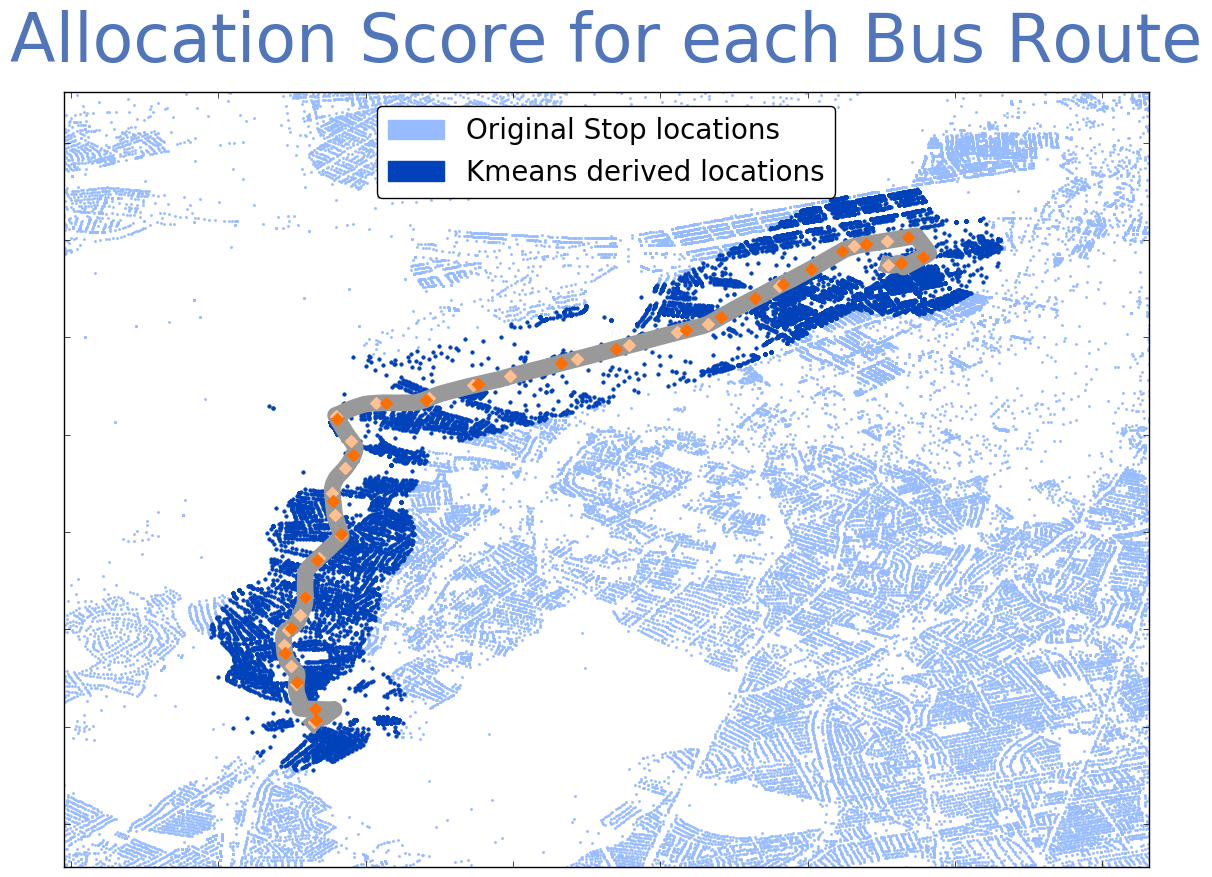

In [33]:
visualize_stops1(route,stops_dict, stops, result_set, tree_keys, points_dict)